# Task # 4 - To Explore Decision Tree Algorithm

# Problem Statement : For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly

In [79]:
# Importing libraries in Python
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [80]:
iris = pd.read_csv("D:\spark foundation\iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [81]:
iris.Species.replace({"Iris-versicolor":0 , "Iris-setosa":1 , "Iris-virginica":2} , inplace = True)

In [82]:
iris_x = iris.iloc[:, 1:5]
iris_y = iris.iloc[:,-1]

### Split the data into train and test

In [83]:
from sklearn.model_selection import train_test_split
iris_x_train,iris_x_test, iris_y_train, iris_y_test = train_test_split(iris_x,iris_y, test_size = 0.2)

In [84]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import pydot

### Defining the decision tree algorithm


In [85]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5)

dtree.fit(iris_x_train , iris_y_train)
print('Decision Tree Classifer Created')

Decision Tree Classifer Created


# Visualize the graph


In [86]:
dot_data = StringIO()   # creating the empty file

In [87]:
iris_x_train_names = iris_x_train.columns

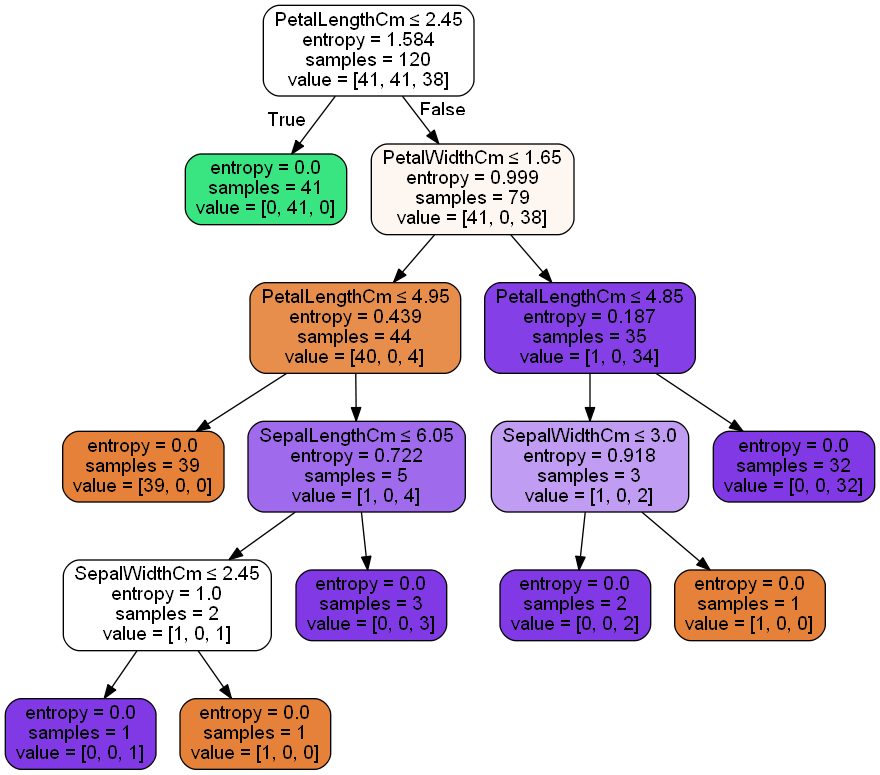

<Figure size 864x864 with 0 Axes>

In [88]:
fig = plt.figure(figsize=(12,12))

export_graphviz(dtree , out_file=dot_data , 
                filled = True , rounded = True , 
                special_characters = True ,  feature_names = iris_x_train_names , )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### You can now feed any new data to this classifer and it would be able to predict the right class accordingly.